<a href="https://colab.research.google.com/github/zbennett349/Homework4/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [26]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [28]:
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
predicted = gnb.predict(X = X_test)

expected = y_test

In [30]:
print(f'gnb.score: {gnb.score(X_test, y_test):.2%}')

gnb.score: 93.71%


In [31]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = expected, y_pred = predicted)

confusion

array([[48,  5],
       [ 4, 86]])

In [32]:
from sklearn.metrics import classification_report

classification = [str(cancer) for cancer in cancer.target_names]

print(classification_report(expected, predicted, target_names = classification))

              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



Text(0.5, 1.0, 'Confusion Matrix')

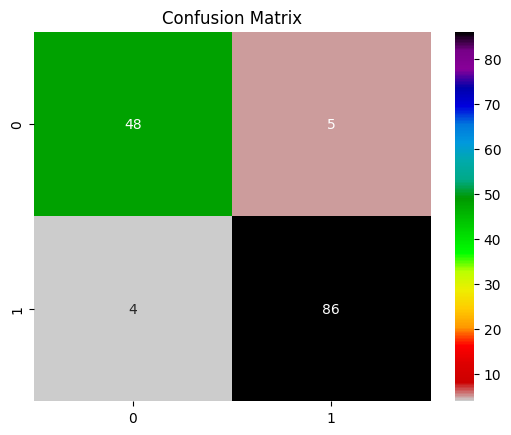

In [33]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index = range(2), columns = range(2))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot = True, cmap = 'nipy_spectral_r')
axes.set_title('Confusion Matrix')

In [34]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = gnb, X = cancer.data, y = cancer.target, cv = kfold)

scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [37]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

estimators = {'GaussianNB': gnb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [38]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    scores = cross_val_score(estimator = estimator_object, X = cancer.data, y = cancer.target, cv = kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy = {scores.mean():.2%}; ' +
          f'standard deviation = {scores.std():.2%}')

          GaussianNB: mean accuracy = 93.85%; standard deviation = 3.36%
KNeighborsClassifier: mean accuracy = 93.15%; standard deviation = 4.11%
  LogisticRegression: mean accuracy = 95.25%; standard deviation = 3.85%
                 SVC: mean accuracy = 92.09%; standard deviation = 3.88%
